In [ ]:
Name: RAZAFINIRINA Nick Kevin

# Answer 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import svm

Load the data and display the column names

In [ ]:
diabetes_ds = datasets.load_diabetes()
print(diabetes_ds.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


Conversion into pandas dataframe

In [ ]:
df = pd.DataFrame(diabetes_ds.data, columns=diabetes_ds.feature_names)
df['target'] = pd.Series(diabetes_ds.target)
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [ ]:
X = df.drop('target', axis=1).values
y = df['target']

## Create models

For linear regression

In [ ]:
lnreg_model = linear_model.LinearRegression()

For polynomial regression

In [ ]:
polreg_model = linear_model.LinearRegression()

SVR with different kernel and hyperparameter

In [ ]:
svr_ln1 = svm.SVR(kernel='linear', C=1000)
svr_ln2 = svm.SVR(kernel='linear', C=500)
svr_pol1 = svm.SVR(kernel='poly', C=1000, degree=2)
svr_pol2 = svm.SVR(kernel='poly', C=700, degree=3)

## Split validation

In [ ]:
poly = PolynomialFeatures(degree=2)

In [ ]:
x_transform = poly.fit_transform(X)

print(x_transform.shape)

(442, 66)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print('X-Train -shape of input features for training', x_train.shape)
print('X-Test -shape of input features for training', x_test.shape)

X-Train -shape of input features for training (353, 10)
X-Test -shape of input features for training (89, 10)


In [ ]:
poly_x_train, poly_x_test, poly_y_train, poly_y_test = train_test_split(x_transform, y, test_size=0.2, random_state=42)

In [ ]:
poly_x_train = np.array(poly_x_train)
poly_x_test = np.array(poly_x_test)
print('Polynomial X-Train -shape of input features for training', poly_x_train.shape)
print('Polynomial X-Test -shape of input features for training', poly_x_test.shape)

Polynomial X-Train -shape of input features for training (353, 66)
Polynomial X-Test -shape of input features for training (89, 66)


## Training

In [ ]:
lnreg_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
polreg_model.fit(poly_x_train, y_train)

LinearRegression()

In [ ]:
svr_ln1.fit(x_train, y_train)

SVR(C=1000, kernel='linear')

In [ ]:
svr_ln2.fit(x_train, y_train)

SVR(C=500, kernel='linear')

In [ ]:
svr_pol1.fit(x_train, y_train)

SVR(C=1000, degree=2, kernel='poly')

In [ ]:
svr_pol2.fit(x_train, y_train)

SVR(C=700, kernel='poly')

## Predictions

In [ ]:
y_pred_lnreg = lnreg_model.predict(x_test)

In [ ]:
y_pred_polreg = polreg_model.predict(poly_x_test)

In [ ]:
y_pred_svr_ln1 = svr_ln1.predict(x_test)

In [ ]:
y_pred_svr_ln2 = svr_ln2.predict(x_test)

In [ ]:
y_pred_svr_pol1 = svr_pol1.predict(x_test)

In [ ]:
y_pred_svr_pol2 = svr_pol2.predict(x_test)

## Evaluations

In [ ]:
print('Multivariate Linear Regression - Mean Square Error', metrics.mean_squared_error(y_test, y_pred_lnreg))
print('Multivariate Linear Regression - Model R^2 Square value', metrics.r2_score(y_test, y_pred_lnreg))

Multivariate Linear Regression - Mean Square Error 2900.193628493482
Multivariate Linear Regression - Model R^2 Square value 0.4526027629719195


In [ ]:
print('Multivariate Polynomial Regression - Mean Square Error', metrics.mean_squared_error(y_test, y_pred_polreg))
print('Multivariate Polynomial Regression - Model R^2 Square value', metrics.r2_score(y_test, y_pred_polreg))

Multivariate Polynomial Regression - Mean Square Error 3096.0283073442656
Multivariate Polynomial Regression - Model R^2 Square value 0.4156399336408013


In [ ]:
print('SVR(C=1000, kernel=linear) - Mean Square Error', metrics.mean_squared_error(y_test, y_pred_svr_ln1))
print('SVR(C=1000, kernel=linear) - Model R^2 Square value', metrics.r2_score(y_test, y_pred_svr_ln1))

SVR(C=1000, kernel=linear) - Mean Square Error 2936.029257087183
SVR(C=1000, kernel=linear) - Model R^2 Square value 0.4458389648976694


In [ ]:
print('SVR(C=500, kernel=linear) - Mean Square Error', metrics.mean_squared_error(y_test, y_pred_svr_ln2))
print('SVR(C=500, kernel=linear) - Model R^2 Square value', metrics.r2_score(y_test, y_pred_svr_ln2))

SVR(C=500, kernel=linear) - Mean Square Error 2943.1993329123725
SVR(C=500, kernel=linear) - Model R^2 Square value 0.44448564846478367


In [ ]:
print('SVR(C=1000, degree=2, kernel=poly) - Mean Square Error', metrics.mean_squared_error(y_test, y_pred_svr_pol1))
print('SVR(C=1000, degree=2, kernel=poly) - Model R^2 Square value', metrics.r2_score(y_test, y_pred_svr_pol1))

SVR(C=1000, degree=2, kernel=poly) - Mean Square Error 6016.16135036485
SVR(C=1000, degree=2, kernel=poly) - Model R^2 Square value -0.13552076949273473


In [ ]:
print('SVR(C=700, kernel=poly) - Mean Square Error', metrics.mean_squared_error(y_test, y_pred_svr_pol2))
print('SVR(C=700, kernel=poly) - Model R^2 Square value', metrics.r2_score(y_test, y_pred_svr_pol2))

SVR(C=700, kernel=poly) - Mean Square Error 4458.382607038949
SVR(C=700, kernel=poly) - Model R^2 Square value 0.1585022818028523


## Explanation

With an MSE: 2900.19 which is lowest among all models and R²: 0.4526 which is highest among all models, linear regression makes the smallest prediction errors. The data appears to have a mostly linear relationship, so simple linear regression fits best.

With an MSE: 6016.16 and R²: –0.1355, the SVR(C=1000, degree=2, kernel=poly performs worse than predicting the mean value. This polynomial SVR severely overfits or mismatches the structure of your data.

# Answer 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Load the data and display 5 first rows

In [2]:
heart_df = pd.read_csv('/content/drive/MyDrive/Supervised ML/Logistic Regression/processed_cleveland.csv.csv')
print(heart_df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  pred_value  
0  0    6           0  
1  3    3           2  
2  2    7           1  
3  0    3           0  
4  0    3           0  


In [3]:
print('>>> Rows <<<')
print(heart_df.count())
print('\n>>> Info <<<')
print(heart_df.info())

>>> Rows <<<
age           303
sex           303
cp            303
trestbps      303
chol          303
fbs           303
restecg       303
thalach       303
exang         303
oldpeak       303
slope         303
ca            303
thal          303
pred_value    303
dtype: int64

>>> Info <<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1   sex         303 non-null    int64  
 2   cp          303 non-null    int64  
 3   trestbps    303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    int64  
 6   restecg     303 non-null    int64  
 7   thalach     303 non-null    int64  
 8   exang       303 non-null    int64  
 9   oldpeak     303 non-null    float64
 10  slope       303 non-null    int64  
 11  ca          303 non-null    object 
 12  thal        303 non-null

In [4]:
print(heart_df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope  pred_value  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003 

Convert the question mark "?" value in 'ca' & 'thal' columns into NaN

In [5]:
heart_df['ca'] = pd.to_numeric(heart_df['ca'], errors='coerce')
heart_df['thal'] = pd.to_numeric(heart_df['thal'], errors='coerce')

In [6]:
print(heart_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1   sex         303 non-null    int64  
 2   cp          303 non-null    int64  
 3   trestbps    303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    int64  
 6   restecg     303 non-null    int64  
 7   thalach     303 non-null    int64  
 8   exang       303 non-null    int64  
 9   oldpeak     303 non-null    float64
 10  slope       303 non-null    int64  
 11  ca          299 non-null    float64
 12  thal        301 non-null    float64
 13  pred_value  303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None


Seaborn heatmap visualization for the missing/unkown values

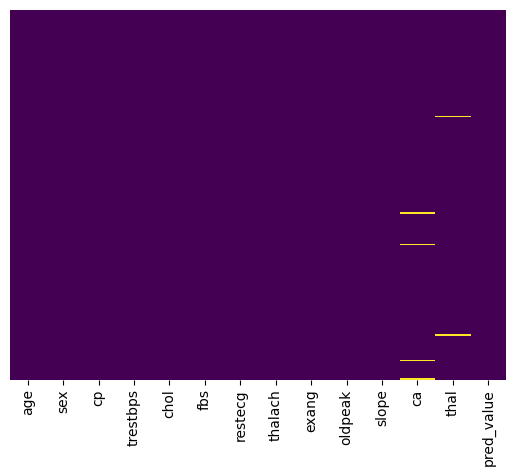

In [7]:
sns.heatmap(heart_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [8]:
heart_df.dropna(inplace=True)

In [9]:
print('>>> Rows <<<')
print(heart_df.count())

>>> Rows <<<
age           297
sex           297
cp            297
trestbps      297
chol          297
fbs           297
restecg       297
thalach       297
exang         297
oldpeak       297
slope         297
ca            297
thal          297
pred_value    297
dtype: int64


split validation

In [10]:
x_train, x_test, y_train, y_test = train_test_split(heart_df.drop('pred_value', axis=1), heart_df['pred_value'], test_size=0.30, random_state=101)

Create, Train & Test the logistic regression model

In [12]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Create, Train & Test the support vector classifier model

In [13]:
svc = svm.SVC(kernel='linear')

In [14]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

generating the confusion matrix and classification report

In [15]:
pred_lr_result = lr.predict(x_test)
lr_cm = confusion_matrix(y_test, pred_lr_result)
print('Confusion matrix for the logistic regression model\n',lr_cm)

Confusion matrix for the logistic regression model
 [[50  1  0  2]
 [11  3  1  4]
 [ 2  2  3  5]
 [ 0  1  4  1]]


In [16]:
pred_svc_result = svc.predict(x_test)
svc_cm = confusion_matrix(y_test, pred_svc_result)
print('Confusion matrix for the SVC model\n', svc_cm)

Confusion matrix for the SVC model
 [[49  2  1  1  0]
 [10  6  0  3  0]
 [ 1  0  4  3  4]
 [ 1  2  1  1  1]
 [ 0  0  0  0  0]]


In [17]:
lr_c_report = classification_report(y_test, pred_lr_result)
print('Classification report for logistic regression\n', lr_c_report)

Classification report for logistic regression
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        53
           1       0.43      0.16      0.23        19
           2       0.38      0.25      0.30        12
           3       0.08      0.17      0.11         6

    accuracy                           0.63        90
   macro avg       0.42      0.38      0.38        90
weighted avg       0.61      0.63      0.60        90



In [18]:
svc_c_report = classification_report(y_test, pred_svc_result)
print('Classification report for SVC\n\n', svc_c_report)

Classification report for SVC

               precision    recall  f1-score   support

           0       0.80      0.92      0.86        53
           1       0.60      0.32      0.41        19
           2       0.67      0.33      0.44        12
           3       0.12      0.17      0.14         6
           4       0.00      0.00      0.00         0

    accuracy                           0.67        90
   macro avg       0.44      0.35      0.37        90
weighted avg       0.70      0.67      0.66        90



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


From the reports, the SVC has better stats in general. We can see that the accuracy of the SVC model is greater than the accuracy of logistic regression model. Hence, we can say that the SVC is more powerful